## Water data analysis

Based on the data for the refractive index for water obtained from [Hale and Querry, 1972](https://www.osapublishing.org/DirectPDFAccess/708361D2-E23B-2829-BC7E0545BD100028_17737/ao-12-3-555.pdf?da=1&id=17737&seq=0&mobile=no) we perform the same analysis done for the silver case.

* Data interpolation decision
* Experimental data analysis 

In [1]:
import numpy 
%matplotlib notebook

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
from data_analysis_helper import plot_refrac , linear_interp, spline, spline_eval, plot_interpolation

In [4]:
lambda_w , n_w , k_w = numpy.loadtxt('gold_silver_water_raw-data/water_HQ72.txt', unpack=True)
lambda_w = lambda_w*1e3 #To convert to nm

<IPython.core.display.Javascript object>


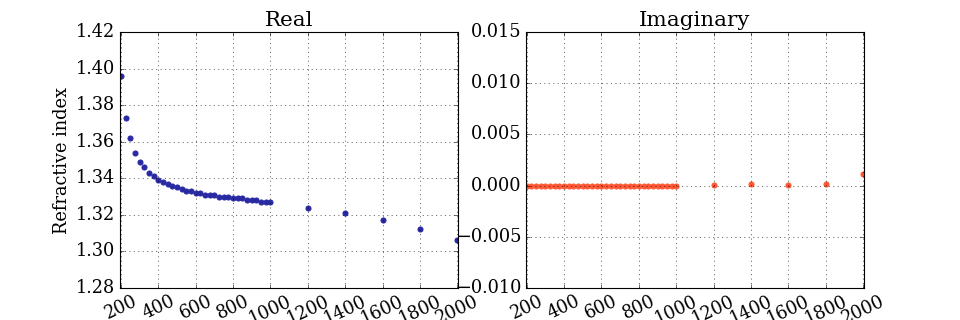

In [5]:
plot_refrac(lambda_w, n_w, k_w)

In [6]:
#linear interpolation
water_real_linear , water_imag_linear = linear_interp(lambda_w, n_w, k_w)

#get spline 
water_real_tuple, water_imag_tuple = spline(lambda_w, n_w, k_w)

#spline evaluation
lambda_x = numpy.linspace(min(lambda_w), max(lambda_w), num=500, endpoint=True)
water_real_spline, water_imag_spline = spline_eval(lambda_x, water_real_tuple, water_imag_tuple)

<IPython.core.display.Javascript object>


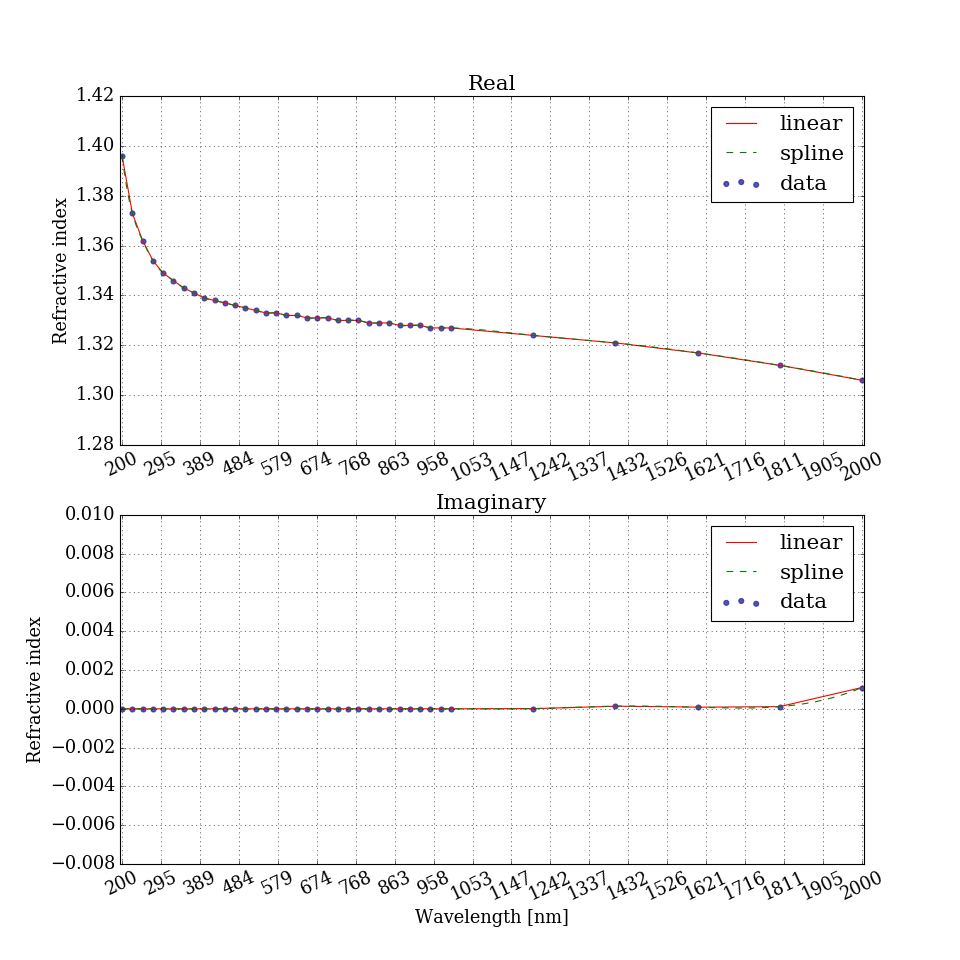

In [7]:
plot_interpolation(lambda_w, n_w, k_w, lambda_x, water_real_linear, 
                   water_imag_linear, water_real_spline, water_imag_spline)


### Plot difference between linear and spline

Let's plot the difference between each interpolation and compare this difference with the experimental errors reported in the paper.

In [8]:
water_diff_real = abs(water_real_linear(lambda_x) - water_real_spline) 
water_diff_imag =  abs(water_imag_linear(lambda_x) - water_imag_spline)


<IPython.core.display.Javascript object>


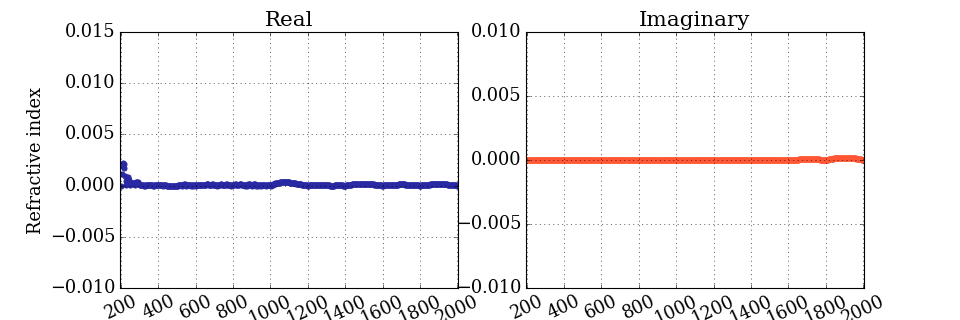

In [9]:
plot_refrac(lambda_x, water_diff_real, water_diff_imag)

The difference between the interpolations is negligible, we will inteprolate the water data using linear interpolation, when we need it. 